# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [298]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [299]:
# from google.colab import drive
# drive.mount('/content/drive')

In [300]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [301]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [303]:
data = joblib.load('data2 2.pkl')
data_with_weather = joblib.load('data2_with_weather 2.pkl')

In [304]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.head()

,Date,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season
0,2015-01-01,23.2,1023,924,NaN,0.903226,1.0,Winter
1,2015-01-02,17.2,3158,2839,NaN,0.898987,0.0,Winter
2,2015-01-03,26.2,1648,1514,NaN,0.918689,0.0,Winter
3,2015-01-04,24.5,1646,1526,NaN,0.927096,0.0,Winter
4,2015-01-05,26.2,4250,3730,NaN,0.877647,0.0,Winter


In [305]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.describe()

,Date,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday
count,2922,2922.000000,2922.000000,2922.000000,2916.000000,2922.000000,2922.000000
mean,2018-12-30 20:16:15.770020352,40.302430,3925.439767,3283.739904,40.316706,0.841568,0.041068
min,2015-01-01 00:00:00,17.200000,527.000000,462.000000,18.800000,0.596996,0.000000
25%,2016-12-31 06:00:00,29.600000,2160.500000,1778.250000,31.296429,0.805960,0.000000
50%,2018-12-30 12:00:00,38.200000,4720.500000,3932.500000,39.042857,0.845615,0.000000
75%,2020-12-29 18:00:00,48.600000,5110.000000,4241.000000,47.007143,0.877720,0.000000
max,2022-12-30 00:00:00,96.100000,6182.000000,5189.000000,83.928571,0.968844,1.000000
std,NaN,14.101169,1509.964823,1249.377978,12.032292,0.052176,0.198481


In [306]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2922 non-null   datetime64[ns]
 1   AVG_Waited     2922 non-null   float64       
 2   Received       2922 non-null   int64         
 3   Boarded        2922 non-null   int64         
 4   Rolling_Mean   2916 non-null   float64       
 5   Boarding_rate  2922 non-null   float64       
 6   holiday        2922 non-null   float64       
 7   season         2922 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 162.8 KB


In [307]:
data.index = data['Date']
data.drop('Date', axis=1, inplace=True)

In [308]:
data

,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season
Date,,,,,,,
2015-01-01,23.2,1023,924,NaN,0.903226,1.0,Winter
2015-01-02,17.2,3158,2839,NaN,0.898987,0.0,Winter
2015-01-03,26.2,1648,1514,NaN,0.918689,0.0,Winter
2015-01-04,24.5,1646,1526,NaN,0.927096,0.0,Winter
2015-01-05,26.2,4250,3730,NaN,0.877647,0.0,Winter
...,...,...,...,...,...,...,...
2022-12-26,39.2,5555,4605,43.485714,0.828983,0.0,Winter
2022-12-27,44.4,5635,4654,42.771429,0.825909,0.0,Winter
2022-12-28,44.8,5654,4648,43.514286,0.822073,0.0,Winter


## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [309]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data = data.dropna()

In [310]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data

,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season
Date,,,,,,,
2015-01-07,24.7,4085,3676,23.657143,0.899878,0.0,Winter
2015-01-08,21.2,4030,3728,23.371429,0.925062,0.0,Winter
2015-01-09,21.8,4167,3813,24.028571,0.915047,0.0,Winter
2015-01-10,41.2,1916,1645,26.171429,0.858559,0.0,Winter
2015-01-11,28.8,1700,1572,26.785714,0.924706,0.0,Winter
...,...,...,...,...,...,...,...
2022-12-26,39.2,5555,4605,43.485714,0.828983,0.0,Winter
2022-12-27,44.4,5635,4654,42.771429,0.825909,0.0,Winter
2022-12-28,44.8,5654,4648,43.514286,0.822073,0.0,Winter


### (2) 가변수화

In [311]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data = pd.get_dummies(data = data, columns = ['season'], drop_first=True, dtype = 'int')

### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [312]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

target = 'AVG_Waited'

#### 1) x, y 나누기

In [313]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# x와 y 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [314]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91, shuffle=False)

In [315]:
x_test

,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season_Summer,season_Fall,season_Winter
Date,,,,,,,,
2022-10-01,2528,2037,44.057143,0.805775,0.0,0,1,0
2022-10-02,1935,1631,44.200000,0.842894,0.0,0,1,0
2022-10-03,1707,1374,41.257143,0.804921,1.0,0,1,0
2022-10-04,5923,4968,40.885714,0.838764,0.0,0,1,0
2022-10-05,5916,4935,41.414286,0.834178,0.0,0,1,0
...,...,...,...,...,...,...,...,...
2022-12-26,5555,4605,43.485714,0.828983,0.0,0,0,1
2022-12-27,5635,4654,42.771429,0.825909,0.0,0,0,1
2022-12-28,5654,4648,43.514286,0.822073,0.0,0,0,1


### (4) Scaling
* KNN, SVM 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [316]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [317]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [318]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [319]:
def pred_plot(y_val, pred, date, name=''):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    if name != '':
        plt.title(name + ' Model Result')
    plt.show()

### (1) 머신러닝

#### 1) 선형 회귀

In [320]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- LinearRegression
MAE: 3.3767145651658663
MAPE: 0.08612313129691851
R2 Score: 0.44573535271643927


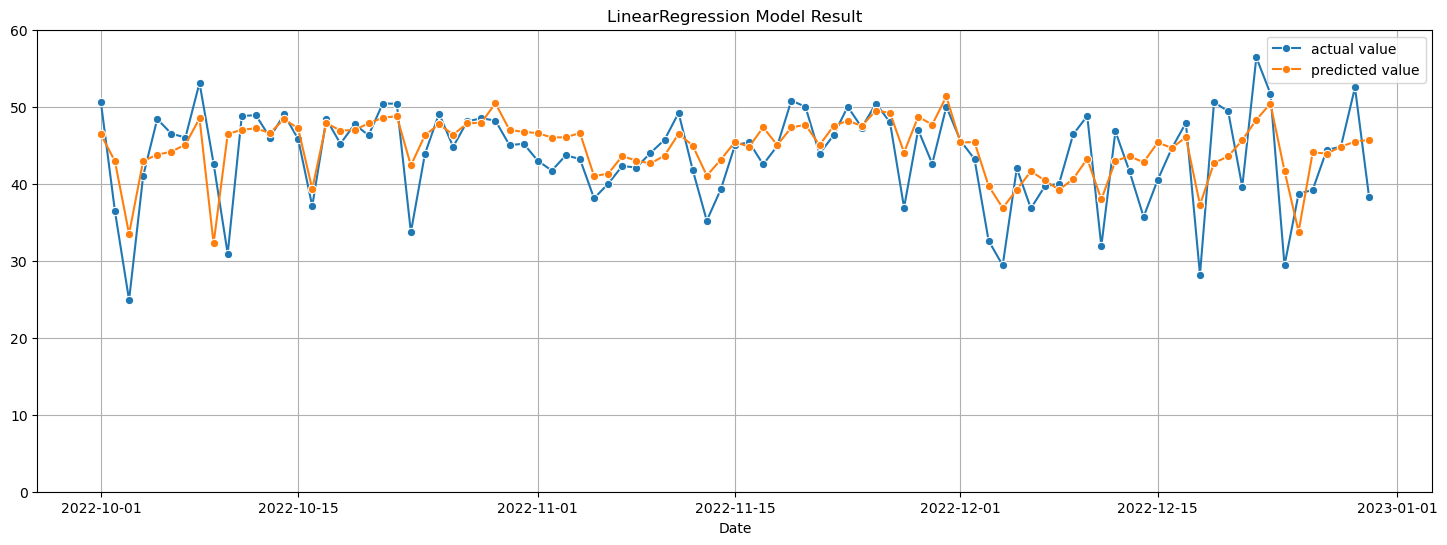

In [321]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [322]:
result = {}
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 2) 릿지

In [323]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = Ridge()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- Ridge
MAE: 3.406464598297341
MAPE: 0.08657409938298483
R2 Score: 0.44075958129687753


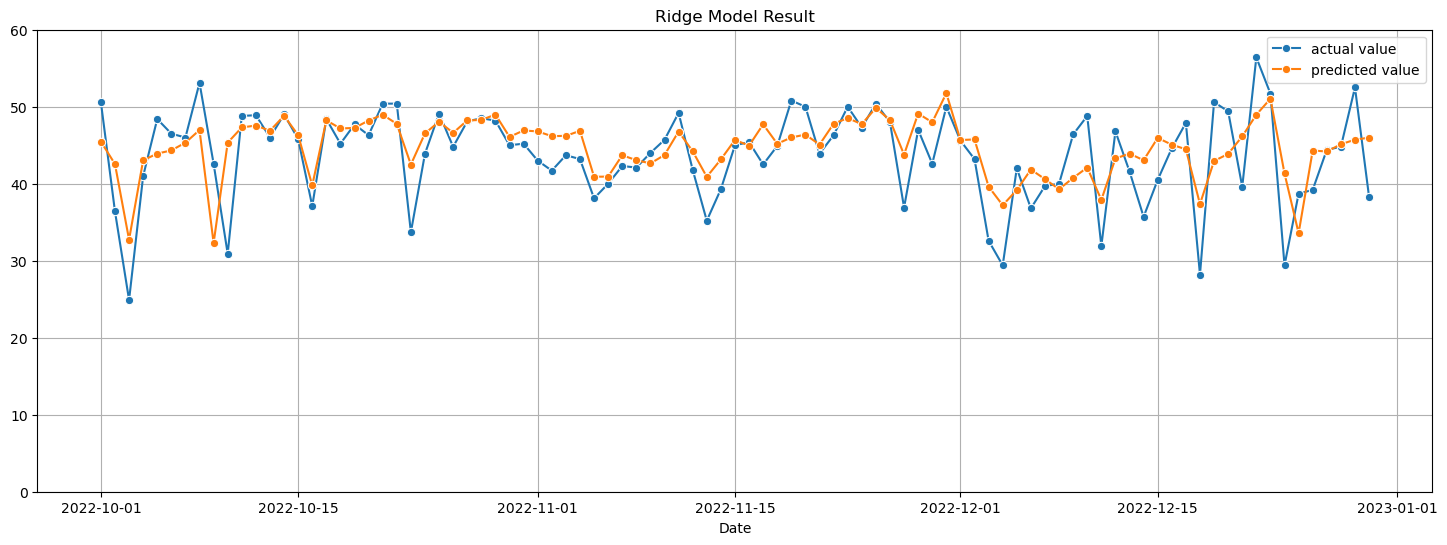

In [324]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [325]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 3) 라쏘

In [326]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = Lasso()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- Lasso
MAE: 3.575158968335311
MAPE: 0.09032191788361511
R2 Score: 0.40072019820247406


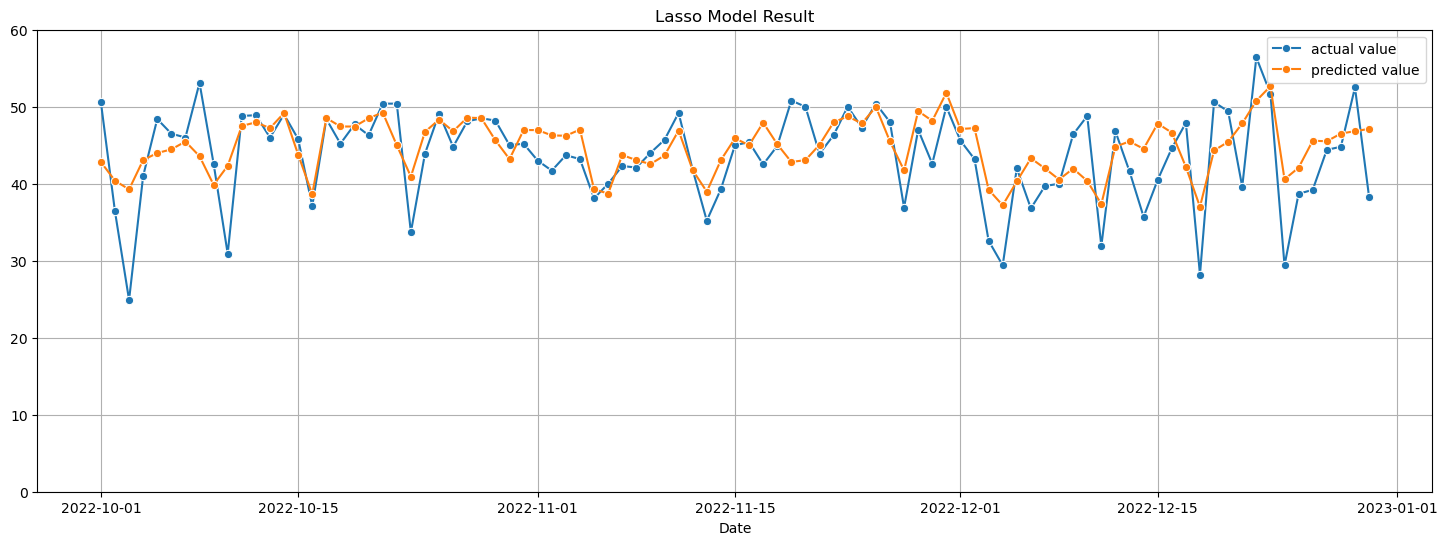

In [327]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

#### 4) 엘라스틱 넷

In [328]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

In [329]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = ElasticNet()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- ElasticNet
MAE: 3.5758510676290585
MAPE: 0.09034424807423534
R2 Score: 0.4004899007153987


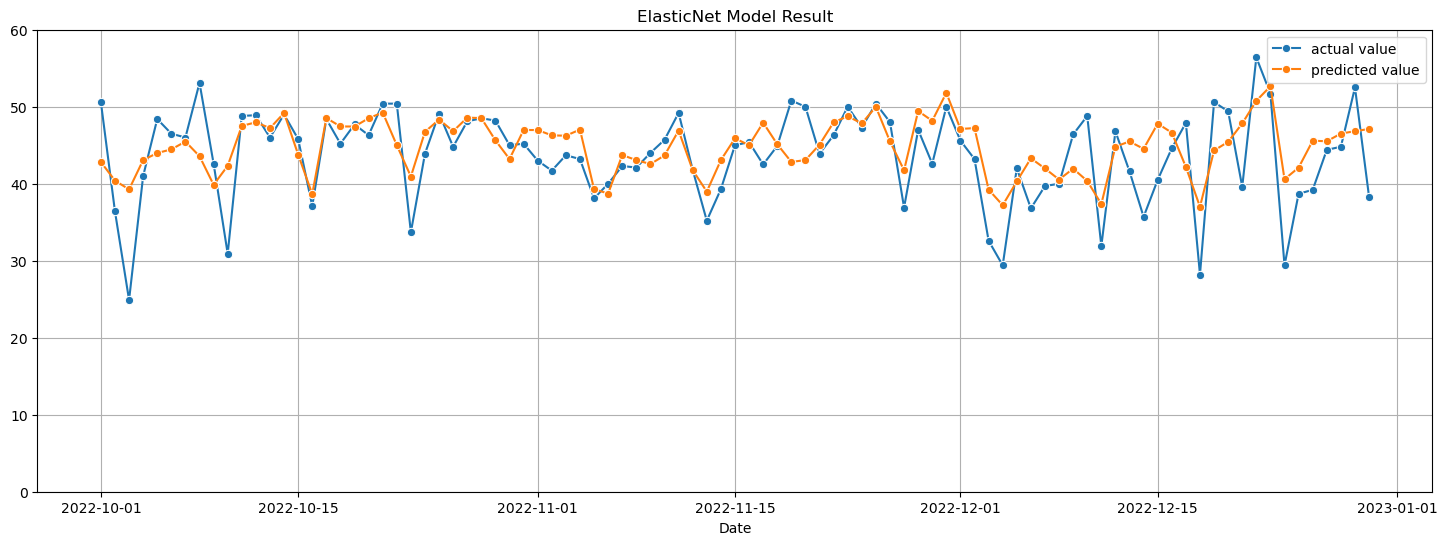

In [330]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [331]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 5) 서포트 벡터 머신

In [332]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = SVR(C = 3, epsilon = 0.1, gamma = 'scale')
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

- SVR
MAE: 3.55681754141064
MAPE: 0.08877107790943456
R2 Score: 0.3415448671161765


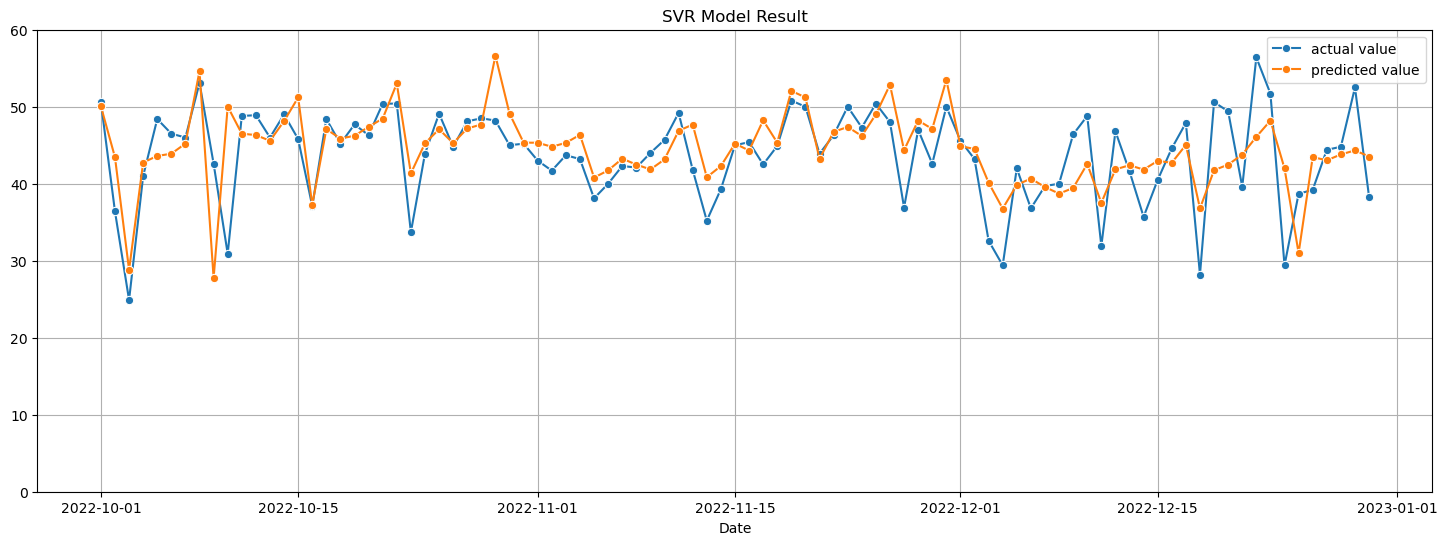

In [333]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [334]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 6) 랜덤 포레스트

In [335]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- RandomForestRegressor
MAE: 3.749604395604396
MAPE: 0.09322162810008304
R2 Score: 0.3377902305529401


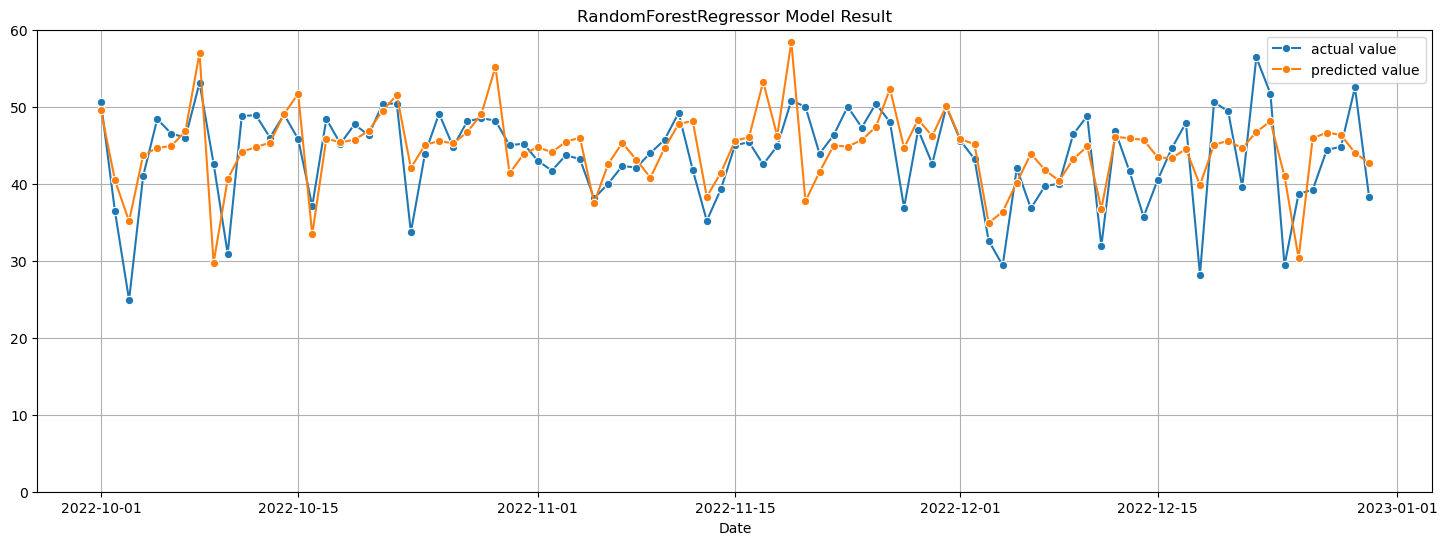

In [336]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [337]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 7) 경사 부스팅

In [338]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- GradientBoostingRegressor
MAE: 3.341969319957192
MAPE: 0.08434213519478868
R2 Score: 0.4040592855777996


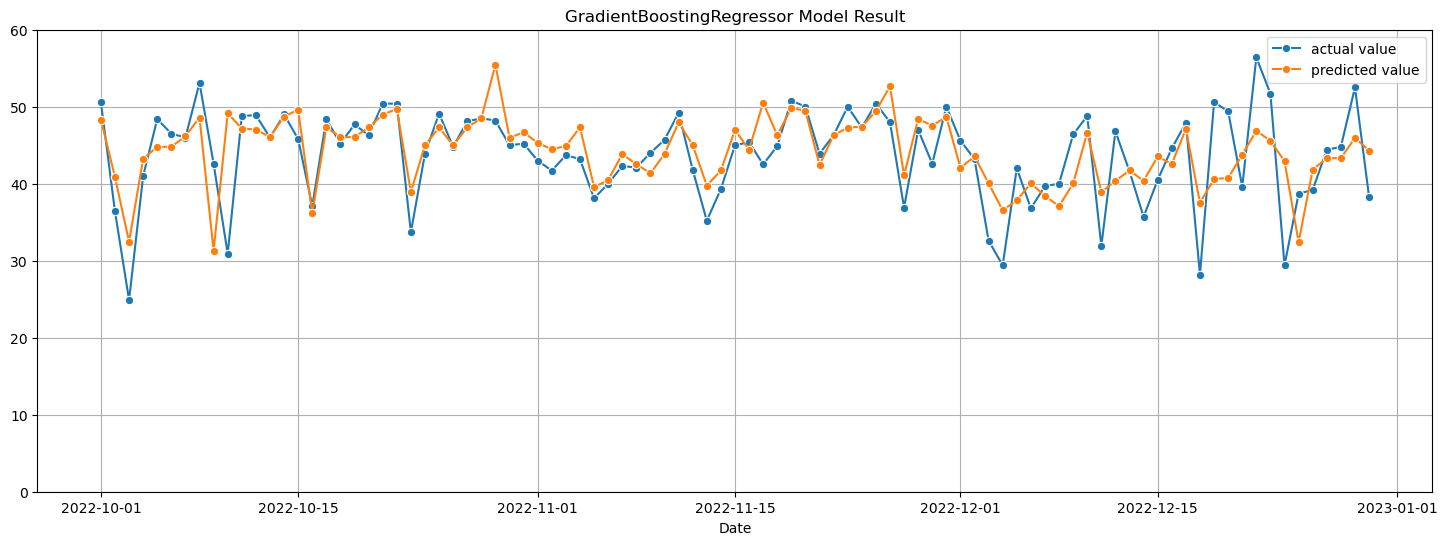

In [339]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [340]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 8) K근접이웃

In [341]:
# 기본 모델 선언
model = KNeighborsRegressor()

# 파라미터 지정
  # max_depth: range(1, 21)
param = {'n_neighbors': range(1,21)}

# 모델 선언
model_knn = GridSearchCV(model,
                    param,
                    cv=5,
                    scoring='r2')

In [342]:
# 학습하기(많은 시간이 소요될 수 있음)
model_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='r2')

In [343]:
# 최적 파라미터, 예측 최고 성능
print('최적 파라미터:',model_knn.best_params_)
print('예측 최고 성능:',model_knn.best_score_)

최적 파라미터: {'n_neighbors': 11}
예측 최고 성능: 0.4295743486448916


In [344]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = KNeighborsRegressor(n_neighbors=11)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

- KNeighborsRegressor
MAE: 3.802297702297703
MAPE: 0.09288659927671807
R2 Score: 0.2848526961023805


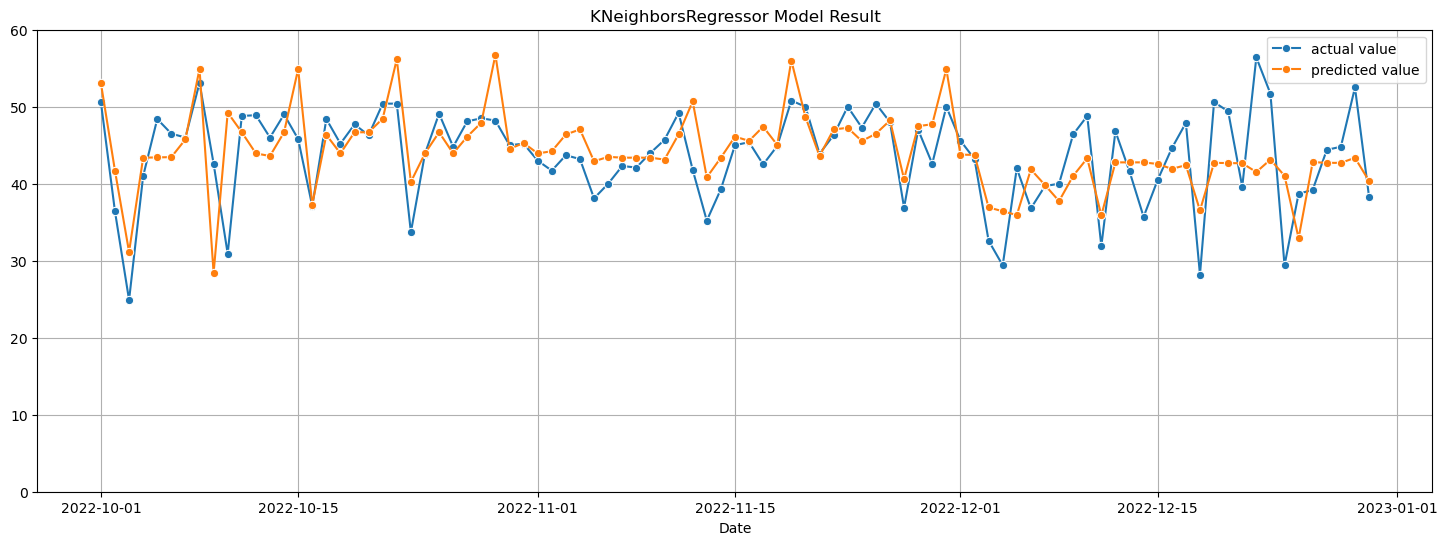

In [345]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [346]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 9) 결정 트리

In [347]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- DecisionTreeRegressor
MAE: 5.037362637362637
MAPE: 0.12027932155251167
R2 Score: -0.4007724846563614


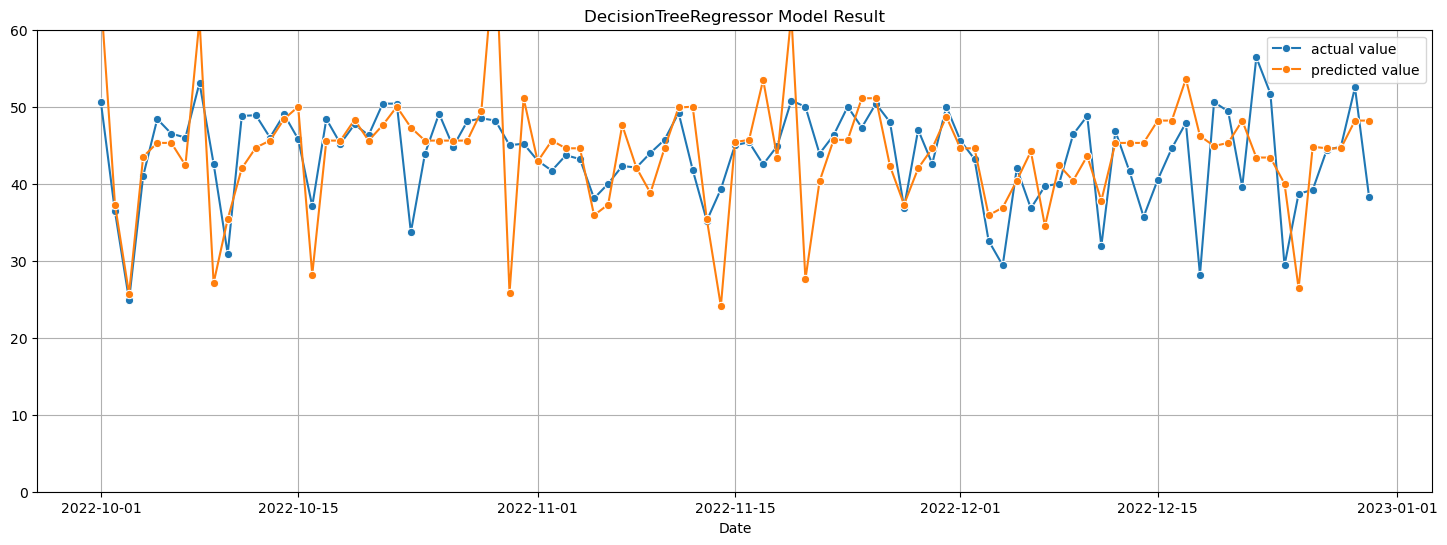

In [348]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [349]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 10) XGB

In [350]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- XGBRegressor
MAE: 3.7156266264863063
MAPE: 0.09171482859822004
R2 Score: 0.34846902052762097


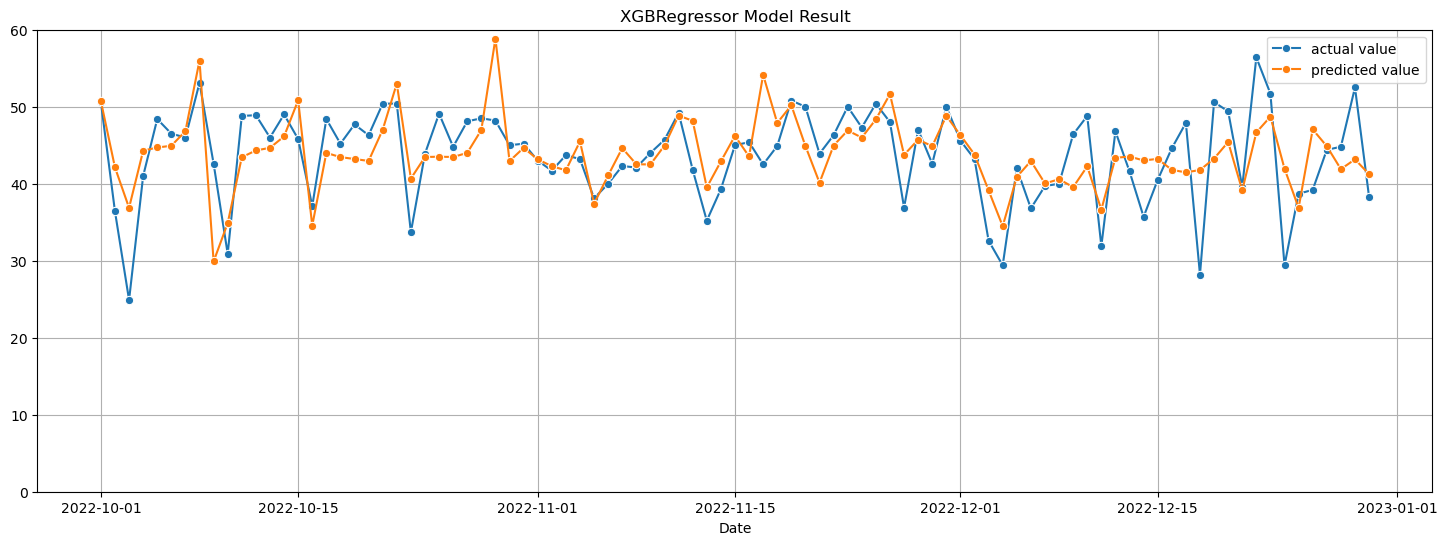

In [351]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [352]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 11) LightGBM

In [353]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = LGBMRegressor(verbose = -1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- LGBMRegressor
MAE: 3.543803401476821
MAPE: 0.09087321762559286
R2 Score: 0.37837553265197954


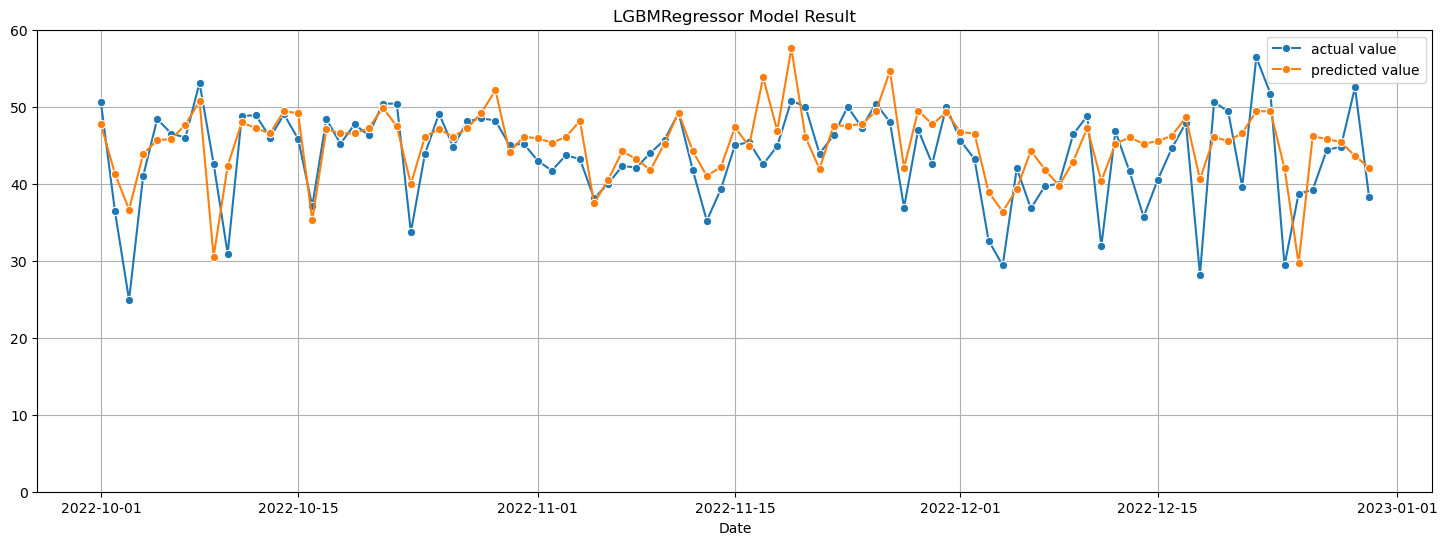

In [354]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [355]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

## 3.모델별 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [356]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print('=' * 40)
for m_name, value in result.items():
    print(f"{m_name}\n   MAE      : {value.get('MAE')}\n   MAPE     : {value.get('MAPE')}\n   R2 Score : {value.get('R2 Score')}")
print('=' * 40)
# {min(result.values())}

LinearRegression
   MAE      : 3.3767145651658663
   MAPE     : 0.08612313129691851
   R2 Score : 0.44573535271643927
Ridge
   MAE      : 3.406464598297341
   MAPE     : 0.08657409938298483
   R2 Score : 0.44075958129687753
Lasso
   MAE      : 3.575158968335311
   MAPE     : 0.09032191788361511
   R2 Score : 0.40072019820247406
ElasticNet
   MAE      : 3.5758510676290585
   MAPE     : 0.09034424807423534
   R2 Score : 0.4004899007153987
SVR
   MAE      : 3.55681754141064
   MAPE     : 0.08877107790943456
   R2 Score : 0.3415448671161765
RandomForestRegressor
   MAE      : 3.749604395604396
   MAPE     : 0.09322162810008304
   R2 Score : 0.3377902305529401
GradientBoostingRegressor
   MAE      : 3.341969319957192
   MAPE     : 0.08434213519478868
   R2 Score : 0.4040592855777996
KNeighborsRegressor
   MAE      : 3.802297702297703
   MAPE     : 0.09288659927671807
   R2 Score : 0.2848526961023805
DecisionTreeRegressor
   MAE      : 5.037362637362637
   MAPE     : 0.12027932155251167
   R

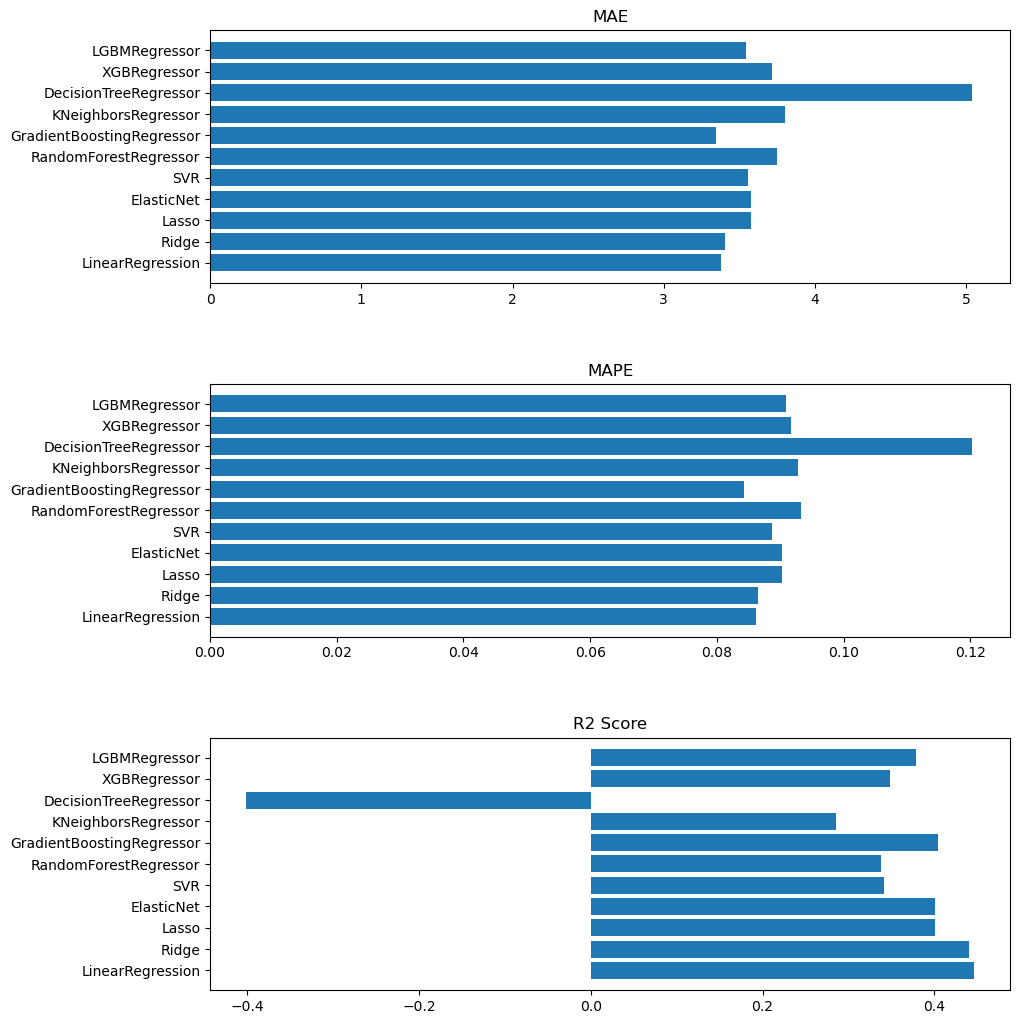

In [357]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

MAE = []
for key, value in result.items():
    MAE.append(value.get('MAE'))

MAPE = []
for key, value in result.items():
    MAPE.append(value.get('MAPE'))
    
R2 = []
for key, value in result.items():
    R2.append(value.get('R2 Score'))

plt.figure(figsize=(10, 12))
    
plt.subplot(3,1,1)
plt.barh(list(result.keys()), MAE)
plt.title('MAE')

plt.subplot(3,1,2)
plt.title('MAPE')
plt.barh(list(result.keys()), MAPE)

plt.subplot(3,1,3)
plt.title('R2 Score')
plt.barh(list(result.keys()), R2)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [358]:
min_mae_key, min_mae_value = min(result.items(), key=lambda x: x[1]['MAE'])
print(f"{min_mae_key}\'s MAE: {min_mae_value['MAE']}")

min_mape_key, min_mape_value = min(result.items(), key=lambda x: x[1]['MAPE'])
print(f"{min_mape_key}\'s MAPE: {min_mae_value['MAPE']}")

max_r2_key, max_r2_value = max(result.items(), key=lambda x: x[1]['R2 Score'])
print(f"{max_r2_key}\'s R2 Score: {max_r2_value['R2 Score']}")

GradientBoostingRegressor's MAE: 3.341969319957192
GradientBoostingRegressor's MAPE: 0.08434213519478868
LinearRegression's R2 Score: 0.44573535271643927


## 4. 날씨가 포함된 데이터

### 머신러닝

In [359]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data_with_weather.head()

,Date,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season,temp_max,rain(mm),humidity_min(%)
0,2015-01-01,23.2,1023,924,NaN,0.903226,1.0,Winter,-2.0,0.0,28.0
1,2015-01-02,17.2,3158,2839,NaN,0.898987,0.0,Winter,2.4,0.0,37.0
2,2015-01-03,26.2,1648,1514,NaN,0.918689,0.0,Winter,8.2,0.0,58.0
3,2015-01-04,24.5,1646,1526,NaN,0.927096,0.0,Winter,7.9,0.0,52.0
4,2015-01-05,26.2,4250,3730,NaN,0.877647,0.0,Winter,4.1,3.4,29.0


In [360]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data_with_weather.describe()

,Date,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,temp_max,rain(mm),humidity_min(%)
count,2922,2922.000000,2922.000000,2922.000000,2916.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,2018-12-30 20:16:15.770020352,40.302430,3925.439767,3283.739904,40.316706,0.841568,0.041068,18.079500,3.355613,41.116632
min,2015-01-01 00:00:00,17.200000,527.000000,462.000000,18.800000,0.596996,0.000000,-11.200000,0.000000,7.000000
25%,2016-12-31 06:00:00,29.600000,2160.500000,1778.250000,31.296429,0.805960,0.000000,9.000000,0.000000,29.000000
50%,2018-12-30 12:00:00,38.200000,4720.500000,3932.500000,39.042857,0.845615,0.000000,19.700000,0.000000,39.000000
75%,2020-12-29 18:00:00,48.600000,5110.000000,4241.000000,47.007143,0.877720,0.000000,27.400000,0.300000,51.000000
max,2022-12-30 00:00:00,96.100000,6182.000000,5189.000000,83.928571,0.968844,1.000000,39.400000,178.900000,98.000000
std,NaN,14.101169,1509.964823,1249.377978,12.032292,0.052176,0.198481,10.705421,12.595804,16.399444


In [361]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data_with_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2922 non-null   datetime64[ns]
 1   AVG_Waited       2922 non-null   float64       
 2   Received         2922 non-null   int64         
 3   Boarded          2922 non-null   int64         
 4   Rolling_Mean     2916 non-null   float64       
 5   Boarding_rate    2922 non-null   float64       
 6   holiday          2922 non-null   float64       
 7   season           2922 non-null   category      
 8   temp_max         2922 non-null   float64       
 9   rain(mm)         2922 non-null   float64       
 10  humidity_min(%)  2922 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(7), int64(2)
memory usage: 231.3 KB


In [362]:
data_with_weather.index = data_with_weather['Date']
data_with_weather.drop('Date', axis=1, inplace=True)

In [363]:
data_with_weather.dropna(inplace=True)

In [364]:
data_with_weather

,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season,temp_max,rain(mm),humidity_min(%)
Date,,,,,,,,,,
2015-01-07,24.7,4085,3676,23.657143,0.899878,0.0,Winter,-0.2,0.0,27.0
2015-01-08,21.2,4030,3728,23.371429,0.925062,0.0,Winter,3.2,0.0,38.0
2015-01-09,21.8,4167,3813,24.028571,0.915047,0.0,Winter,4.3,0.0,33.0
2015-01-10,41.2,1916,1645,26.171429,0.858559,0.0,Winter,2.3,0.0,39.0
2015-01-11,28.8,1700,1572,26.785714,0.924706,0.0,Winter,3.4,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-26,39.2,5555,4605,43.485714,0.828983,0.0,Winter,3.0,0.0,51.0
2022-12-27,44.4,5635,4654,42.771429,0.825909,0.0,Winter,-0.3,0.1,40.0
2022-12-28,44.8,5654,4648,43.514286,0.822073,0.0,Winter,1.7,0.0,34.0


In [365]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data_with_weather = pd.get_dummies(data = data_with_weather, columns = ['season'], drop_first=True, dtype = 'int')

In [366]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

target = 'AVG_Waited'

In [367]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# x와 y 분리
x = data_with_weather.drop(target, axis=1)
y = data_with_weather.loc[:, target]

In [368]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91, shuffle=False)

In [369]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### 1) 선형 회귀

In [370]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- LinearRegression
MAE: 3.3560347513234103
MAPE: 0.08549380853149023
R2 Score: 0.4506051187272927


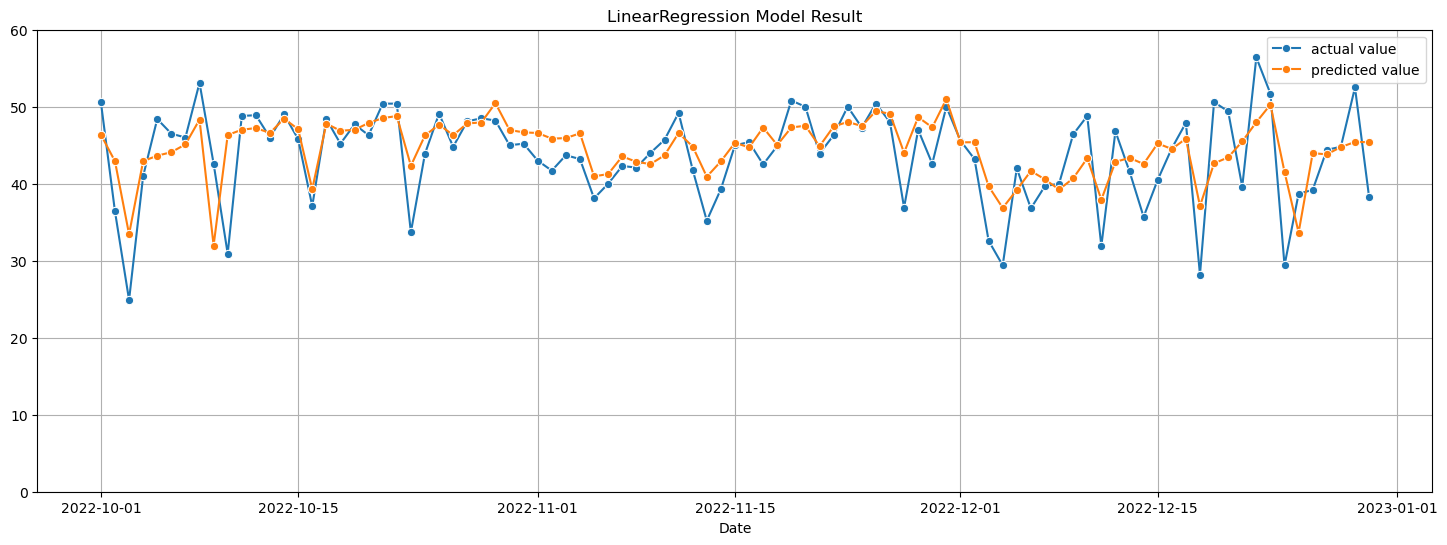

In [371]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [372]:
result = {}
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 2) 릿지

In [373]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = Ridge()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- Ridge
MAE: 3.3841754010610168
MAPE: 0.08589837611595824
R2 Score: 0.4457942802880517


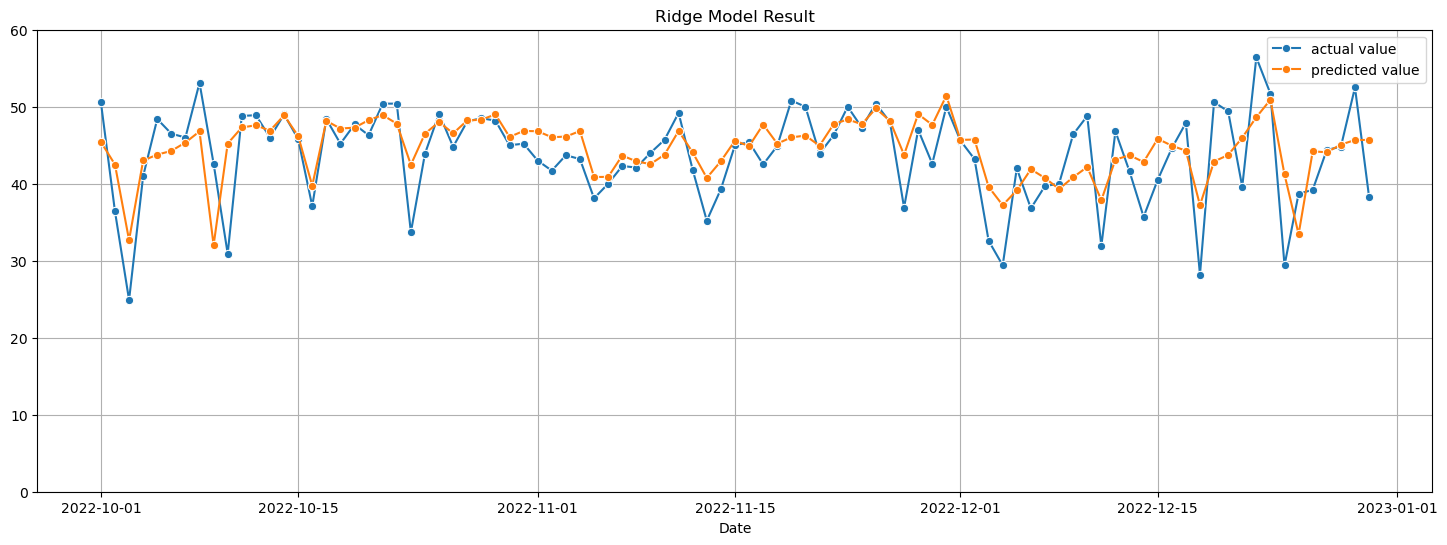

In [374]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [375]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 3) 라쏘

In [376]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = Lasso()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- Lasso
MAE: 3.539162731243504
MAPE: 0.08920044240756013
R2 Score: 0.41206399499451896


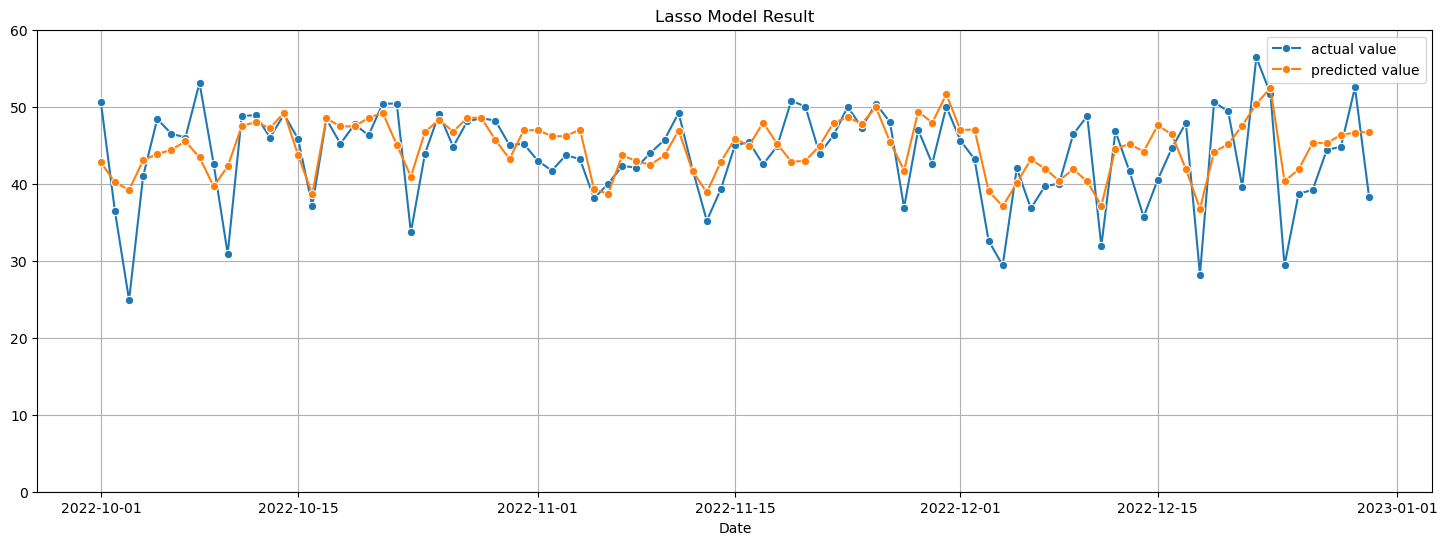

In [377]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [378]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 4) 엘라스틱 넷

In [379]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = ElasticNet()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- ElasticNet
MAE: 3.5245837913013305
MAPE: 0.08872953185916241
R2 Score: 0.4165588979525775


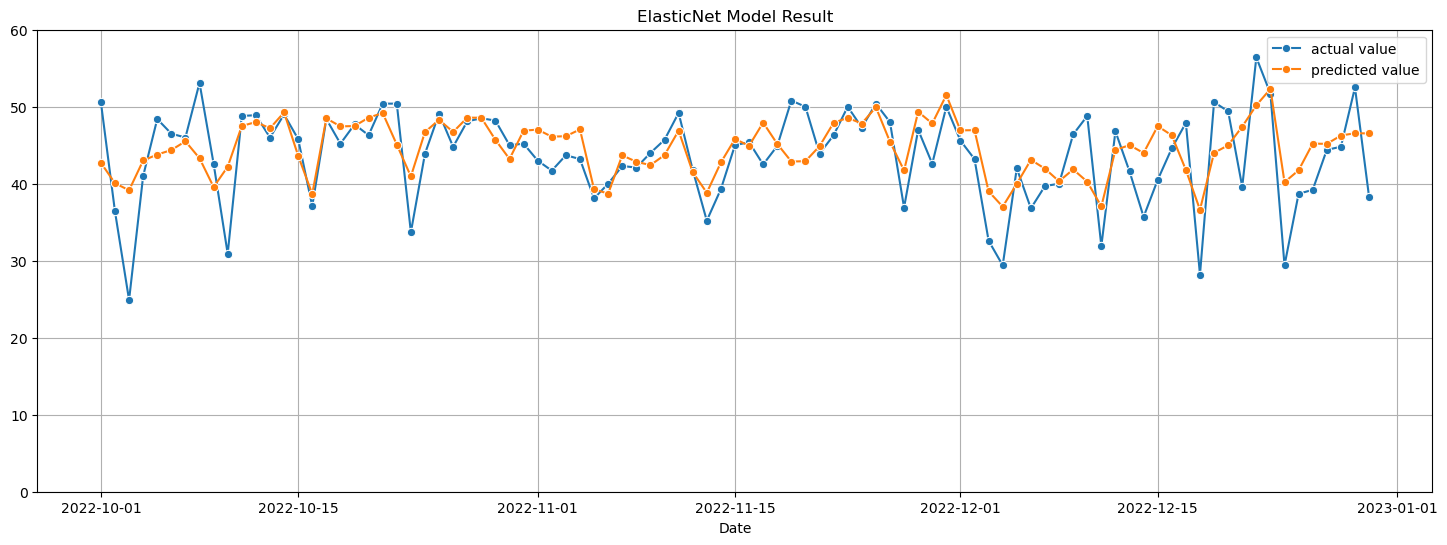

In [380]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [381]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 5) 서포트 벡터 머신

In [382]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = SVR(C = 3, epsilon = 0.1, gamma = 'scale')
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

- SVR
MAE: 3.3320520756320375
MAPE: 0.08343820856872947
R2 Score: 0.40380245463434916


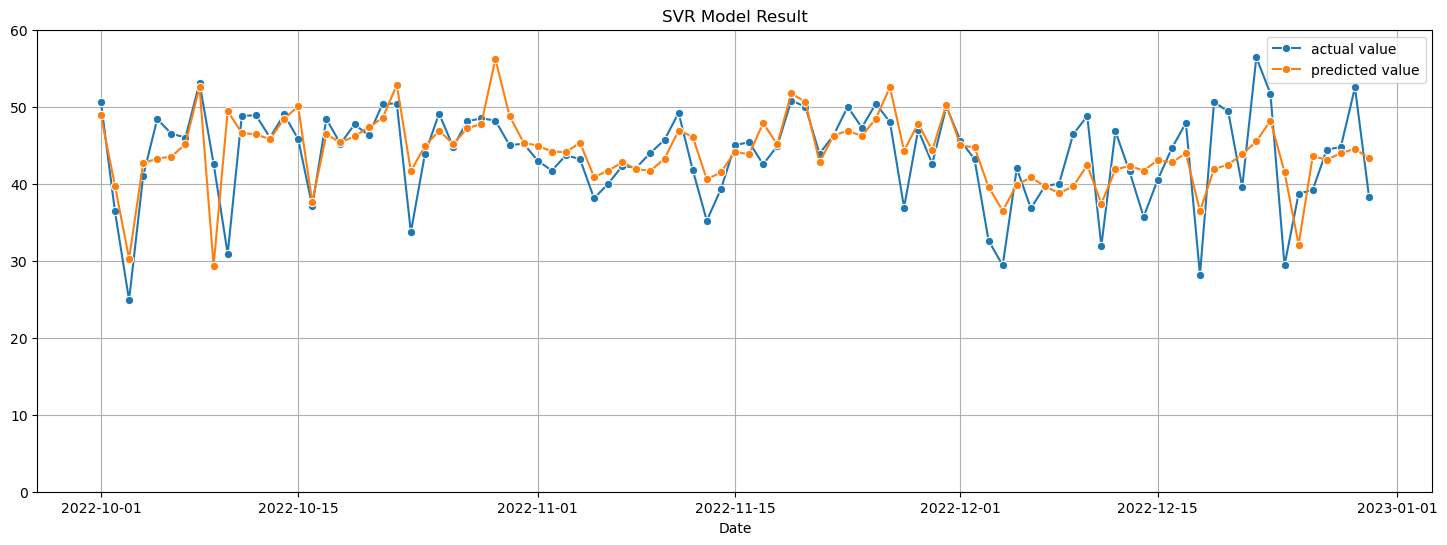

In [383]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [384]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 6) 랜덤 포레스트

In [385]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- RandomForestRegressor
MAE: 3.610351648351649
MAPE: 0.08981884578573705
R2 Score: 0.35399512516963483


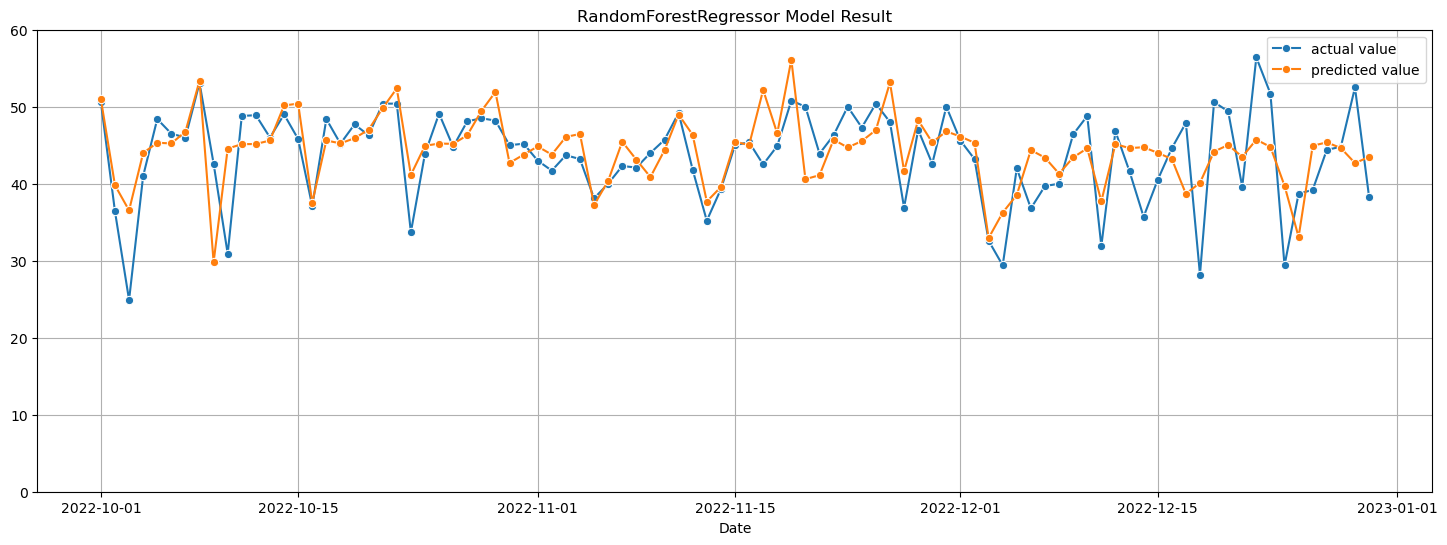

In [386]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [387]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 7) 경사 부스팅

In [388]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- GradientBoostingRegressor
MAE: 3.296767356080362
MAPE: 0.0830213881893514
R2 Score: 0.42043333871584865


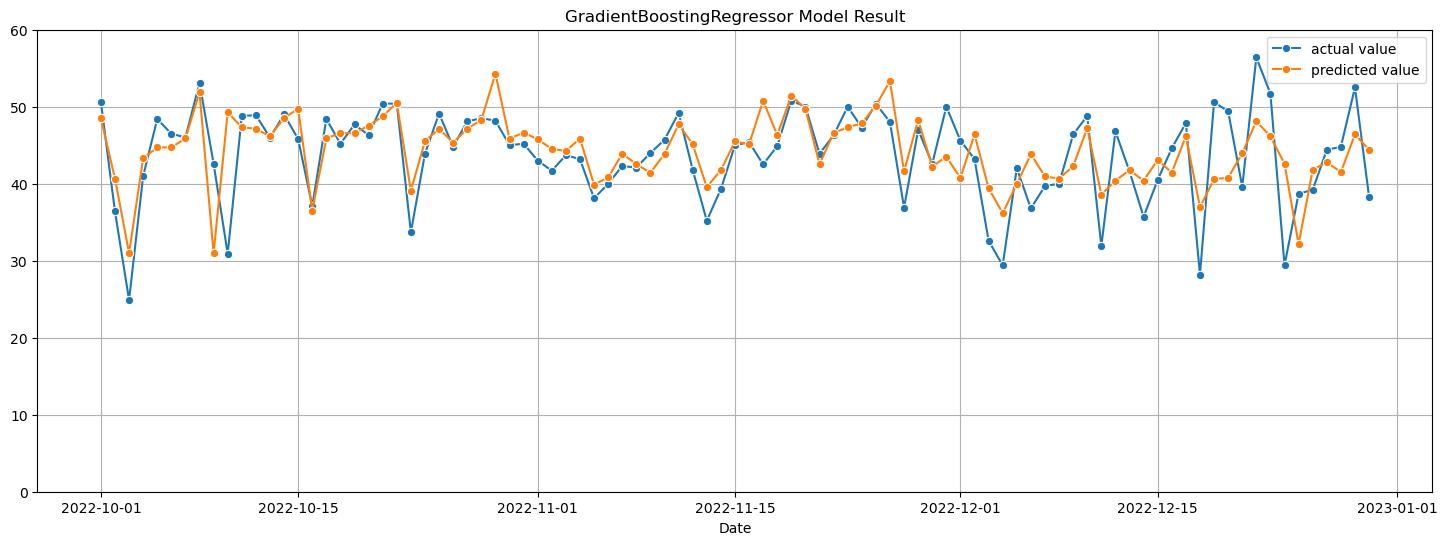

In [389]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [390]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 8) K근접이웃

In [391]:
# 기본 모델 선언
model = KNeighborsRegressor()

# 파라미터 지정
  # max_depth: range(1, 21)
param = {'n_neighbors': range(1,21)}

# 모델 선언
model_knn = GridSearchCV(model,
                    param,
                    cv=5,
                    scoring='r2')

In [392]:
# 학습하기(많은 시간이 소요될 수 있음)
model_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='r2')

In [393]:
# 최적 파라미터, 예측 최고 성능
print('최적 파라미터:',model_knn.best_params_)
print('예측 최고 성능:',model_knn.best_score_)

최적 파라미터: {'n_neighbors': 8}
예측 최고 성능: 0.4334083471807313


In [394]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = KNeighborsRegressor(n_neighbors=8)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

- KNeighborsRegressor
MAE: 4.146291208791209
MAPE: 0.09998779269673067
R2 Score: 0.20757116790009145


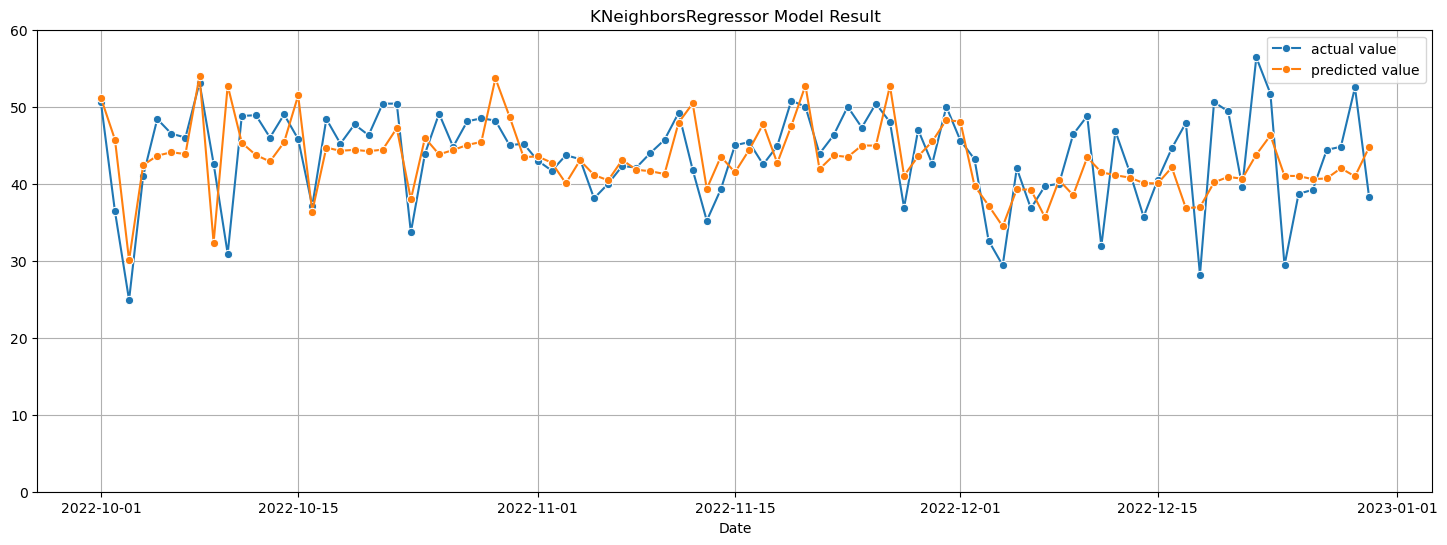

In [395]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [396]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 9) 결정 트리

In [397]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- DecisionTreeRegressor
MAE: 5.0967032967032955
MAPE: 0.12345612704531987
R2 Score: -0.5805099781136824


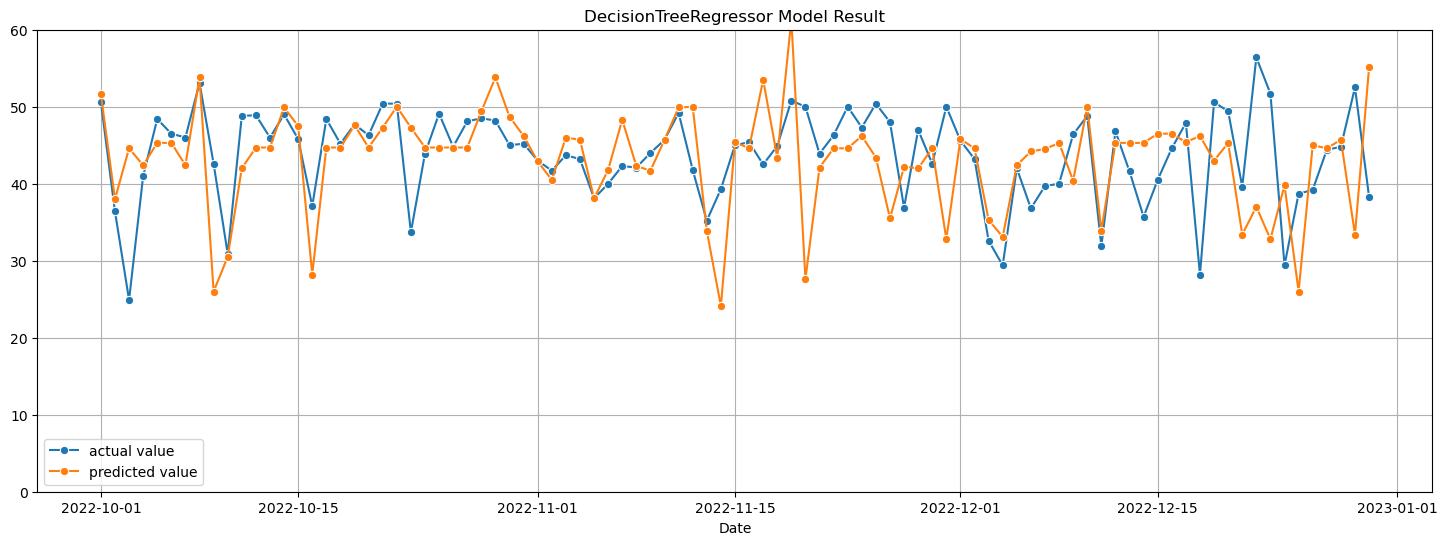

In [398]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [399]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 10) XGB

In [400]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- XGBRegressor
MAE: 3.340234567830851
MAPE: 0.08332223488424247
R2 Score: 0.4507062638574634


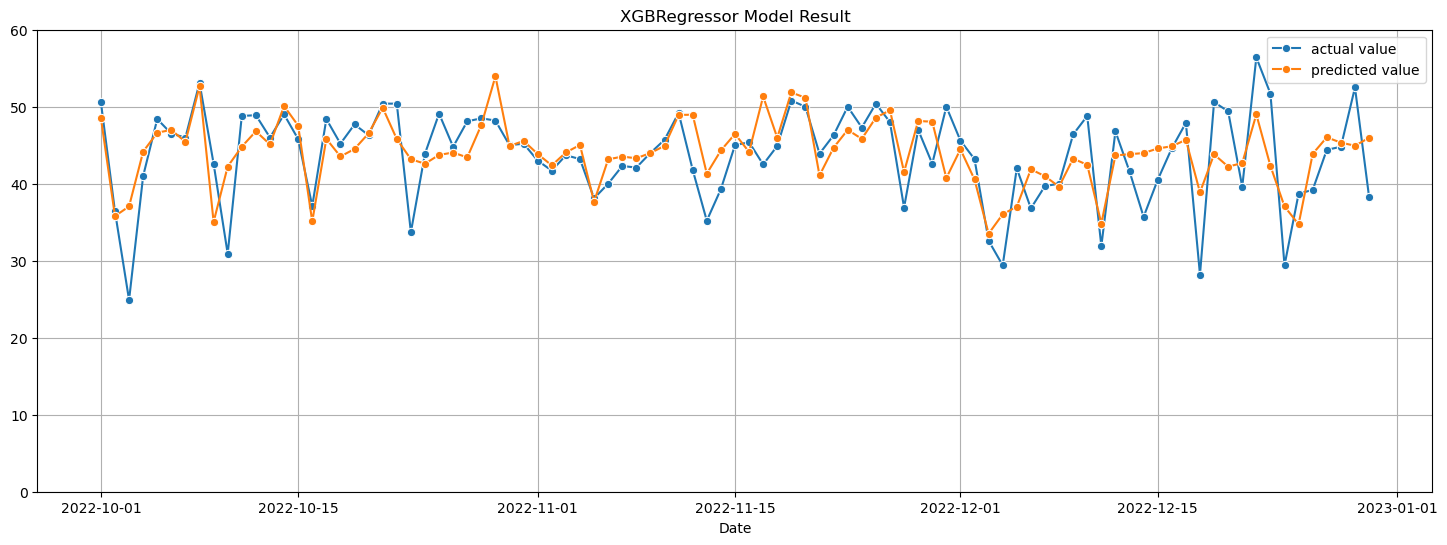

In [401]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [402]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

#### 11) LightGBM

In [403]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model = LGBMRegressor(verbose = -1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

- LGBMRegressor
MAE: 3.4251630918581464
MAPE: 0.08732544442389191
R2 Score: 0.424467724098749


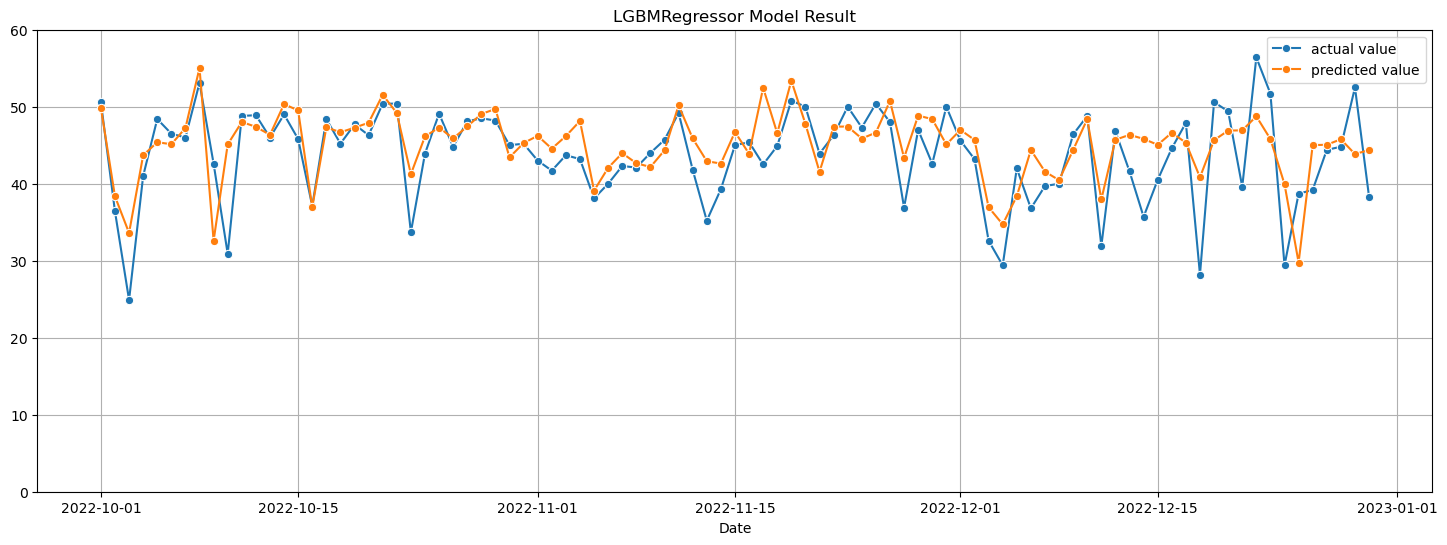

In [404]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)

In [405]:
result[type(model).__name__] = {'MAE':mean_absolute_error(y_test, y_pred),
                                'MAPE':mean_absolute_percentage_error(y_test, y_pred),
                                'R2 Score': r2_score(y_test, y_pred)}

### 모델별 비교

In [406]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print('=' * 40)
for m_name, value in result.items():
    print(f"{m_name}\n   MAE      : {value.get('MAE')}\n   MAPE     : {value.get('MAPE')}\n   R2 Score : {value.get('R2 Score')}")
print('=' * 40)

LinearRegression
   MAE      : 3.3560347513234103
   MAPE     : 0.08549380853149023
   R2 Score : 0.4506051187272927
Ridge
   MAE      : 3.3841754010610168
   MAPE     : 0.08589837611595824
   R2 Score : 0.4457942802880517
Lasso
   MAE      : 3.539162731243504
   MAPE     : 0.08920044240756013
   R2 Score : 0.41206399499451896
ElasticNet
   MAE      : 3.5245837913013305
   MAPE     : 0.08872953185916241
   R2 Score : 0.4165588979525775
SVR
   MAE      : 3.3320520756320375
   MAPE     : 0.08343820856872947
   R2 Score : 0.40380245463434916
RandomForestRegressor
   MAE      : 3.610351648351649
   MAPE     : 0.08981884578573705
   R2 Score : 0.35399512516963483
GradientBoostingRegressor
   MAE      : 3.296767356080362
   MAPE     : 0.0830213881893514
   R2 Score : 0.42043333871584865
KNeighborsRegressor
   MAE      : 4.146291208791209
   MAPE     : 0.09998779269673067
   R2 Score : 0.20757116790009145
DecisionTreeRegressor
   MAE      : 5.0967032967032955
   MAPE     : 0.12345612704531987

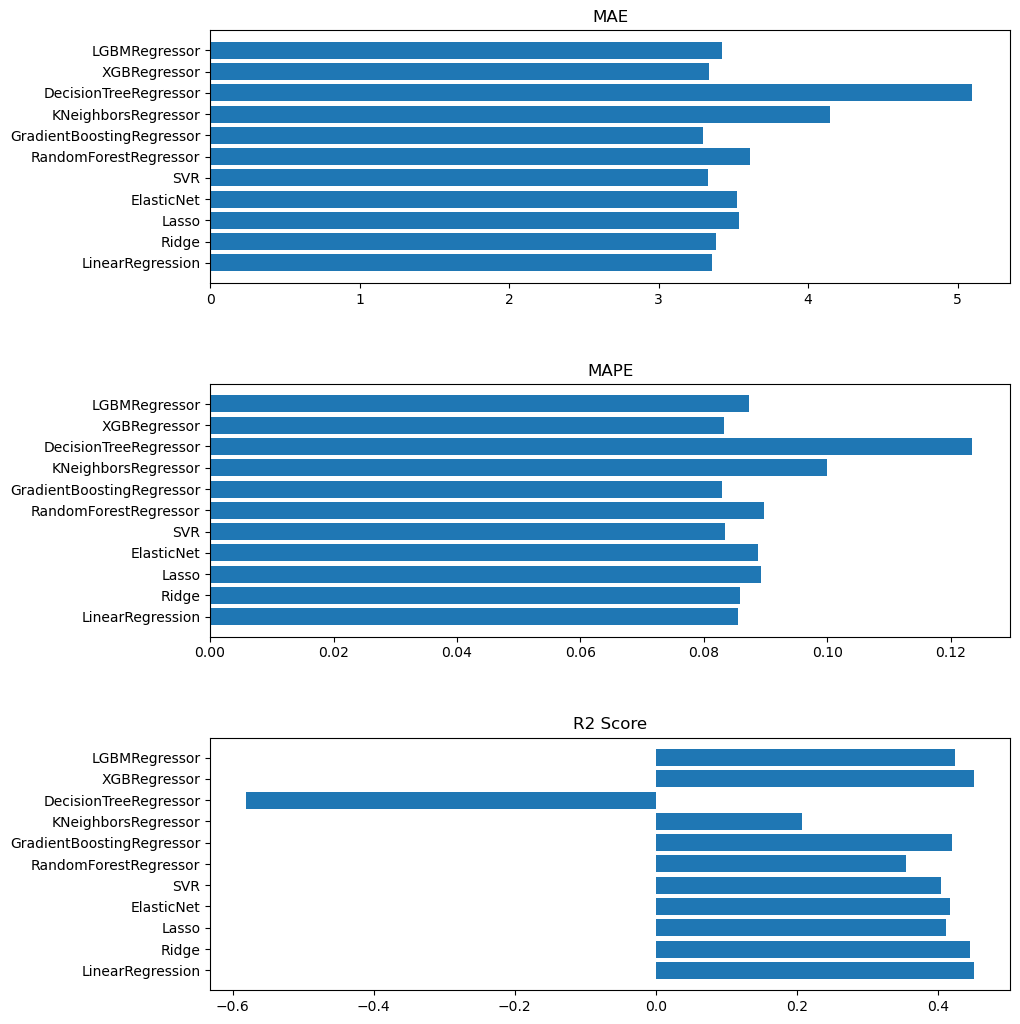

In [407]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

MAE = []
for key, value in result.items():
    MAE.append(value.get('MAE'))

MAPE = []
for key, value in result.items():
    MAPE.append(value.get('MAPE'))
    
R2 = []
for key, value in result.items():
    R2.append(value.get('R2 Score'))

plt.figure(figsize=(10, 12))
    
plt.subplot(3,1,1)
plt.barh(list(result.keys()), MAE)
plt.title('MAE')

plt.subplot(3,1,2)
plt.title('MAPE')
plt.barh(list(result.keys()), MAPE)

plt.subplot(3,1,3)
plt.title('R2 Score')
plt.barh(list(result.keys()), R2)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [408]:
min_mae_key, min_mae_value = min(result.items(), key=lambda x: x[1]['MAE'])
print(f"{min_mae_key}\'s MAE: {min_mae_value['MAE']}")

min_mape_key, min_mape_value = min(result.items(), key=lambda x: x[1]['MAPE'])
print(f"{min_mape_key}\'s MAPE: {min_mae_value['MAPE']}")

max_r2_key, max_r2_value = max(result.items(), key=lambda x: x[1]['R2 Score'])
print(f"{max_r2_key}\'s R2 Score: {max_r2_value['R2 Score']}")

GradientBoostingRegressor's MAE: 3.296767356080362
GradientBoostingRegressor's MAPE: 0.0830213881893514
XGBRegressor's R2 Score: 0.4507062638574634


## 5. 결론

- 이전에 EDA를 통해 상관계수 분석을 해본 결과, 날씨의 상관계수가 크지 않음을 파악하였다.
- 이에 따라, 날씨 데이터가 포함되어있는 데이터와 날씨 데이터가 포함되어있지 않은 데이터로 나누어 두 데이터셋을 학습시킨 후 결과를 비교하기로 하였다.
- 날씨 데이터가 포함되어있는 데이터와 날씨 데이터가 포함되어있지 않은 데이터를 비교하였을 때, 성능의 차이가 크지 않다.
- 특히, 날씨 데이터가 포함되어 있는 데이터들을 학습한 모델은 전체적으로 r2 score가 낮다.
- 즉, 날씨 데이터가 포함되어있는 데이터를 학습할수록 모델의 성능이 떨어진다고 판단할 수 있다.
- 비교 결과, 기상상황이 장애인 콜택시 이용에 있어 중요한 사항이라 생각하기 어렵다.
- 추가로 장애인콜택시의 대중화가 아직은 다소 미흡한 점, 2020년 이후 COIVD-19의 대유행으로 인한 영향 등을 고려했을 때 명확한 결론을 도출하기는 다소 힘들어보인다.
- 따라서, 최대한 합리적인 결정을 위해 비교적 간단한 데이터셋(feature의 수가 더 적음)과 모델의 평가지표 중 MAE와 MAPE 값을 고려하여 모델을 선택하기로 결정하였다.
- 결론적으로 최종 선정된 데이터셋과 모델은 아래와 같다.
    - Data Set = 날씨가 포함되지 않은 데이터셋
    - Machine Learning Algorithm = GradientBoosting
    - Metrics = MAE, MAPE

- GradientBoostingRegressor
MAE: 3.3207087311046766
MAPE: 0.08349641547157986
R2 Score: 0.41868084816576245


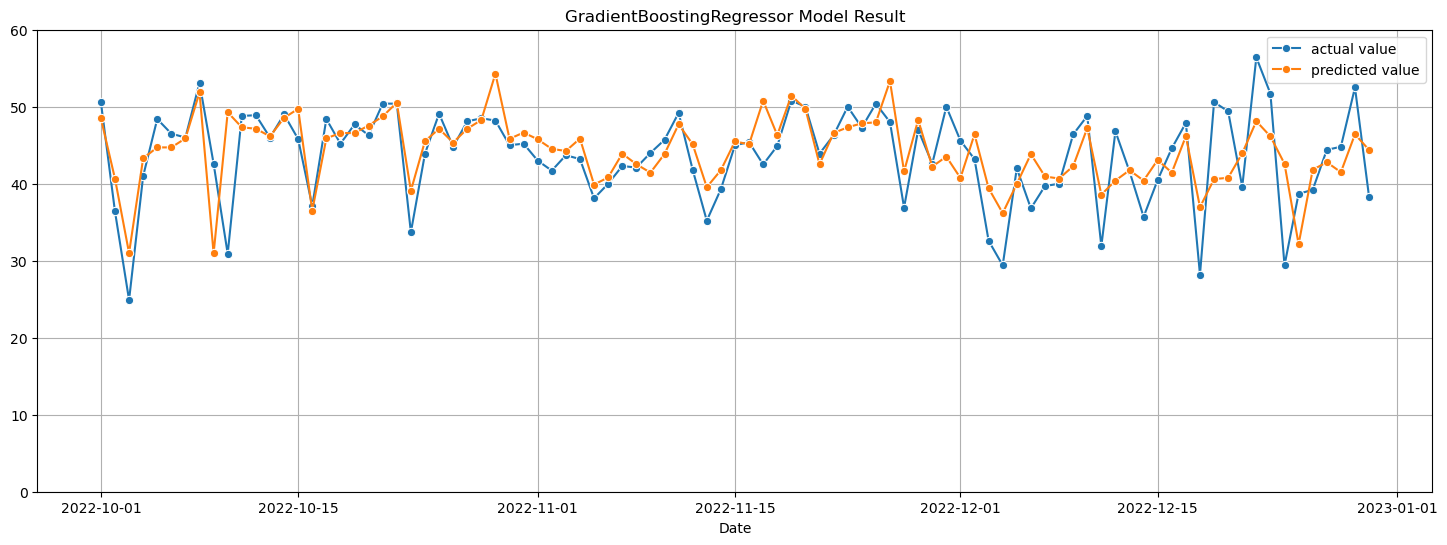

In [409]:
x = data.drop(target, axis=1)
y = data.loc[:, target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91, shuffle=False)

model = GradientBoostingRegressor()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

print(f'- {type(model).__name__}')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
pred_plot(y_test, y_pred, y_test.index, type(model).__name__)